<a href="https://colab.research.google.com/github/koh-hongQ/Understanding_ML_with_Math/blob/main/MLwithMath_Loan_Status%EC%98%88%EC%B8%A1%EB%AA%A8%EB%8D%B8%EB%A7%8C%EB%93%A4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **수학으로 이해하는 기계학습**


---


*  수학과 22학번 고홍규
*  과제 250527
*  데이터 전처리, EDA, Classification





---




본 과제에서는 Loan Prediction Problem Dataset를 활용하여, Loan_Status 여부를 예측합니다.

https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset



# EDA와 적절한 Data pre-processing을 진행하고, 정제된 데이터를 바탕으로 가장 높은 성능의 예측 모델(분류기)를 만드는 것이 목표입니다.

사용 라이브러리 및 코드 분량에 대한 제약이 없으므로, 필요에 따라 코드 스니펫을 추가하여 수행하세요.

#1. Data pre-processing & EDA

**Main Goal : 모델 학습 전 데이터 전처리 및 분석**

**Sub Goals : 모델 학습 및 평가에 필요한 데이터를 전처리합니다.**
1. Types of Variables

2. Data Quality

3. Data Transformation

4. Graphical Summary

4. Data pre-processing에서 모든 feature를 사용해야 합니다.(임의의 feature를 drop하지 마세요.)

Columns(variable) Description
HW에서 활용할 데이터셋(student performance)의 변수 설명입니다.

| **열 이름 (Column)**    | **설명 (Description)**                               |
| -------------------- | -------------------------------------------------- |
| `Loan_ID`            | 고유한 대출 ID (A unique loan ID)                       |
| `Gender`             | 성별 (Male/Female)                                   |
| `Married`            | 혼인 여부 (Yes: 결혼함 / No: 미혼)                          |
| `Dependents`         | 부양가족 수 (Number of persons depending on the client) |
| `Education`          | 학력 (Graduate / Undergraduate)                      |
| `Self_Employed`      | 자영업 여부 (Yes/No)                                    |
| `ApplicantIncome`    | 신청자 소득                                             |
| `Coapplicant income` | 공동 신청자 소득                                          |
| `LoanAmount`         | 대출 금액 (단위: 천 단위)                                   |
| `Loan_Amount_Term`   | 대출 상환 기간 (개월 수)                                    |
| `Credit_Hostory`     | 신용 이력 적합 여부 (meets guidelines)                     |
| `Property_Area`      | 지역 유형 (Urban / Semiurban / Rural)                  |
| `Loan_Status`        | 대출 승인 여부 (Y: 승인, N: 거절)                            |


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/250527EDA과제/train_u6lujuX_CVtuZ9i.csv") # 구글 드라이브에 데이터셋(csv)을 업로드한 후, 경로를 지정해주세요.

1. Types of Variables
과제에서 활용할 Loan Prediction Problem Dataset 데이터셋이 어떤 데이터로 구성되었는지 확인한 후, 각 데이터 타입을 정의합니다. (보고서에 작성)
e.g) nominal, ordinal, discrete, continuous


In [ ]:
# 데이터프레임을 출력하여 확인하기
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### 2. Data Quality

* 모델 학습에 활용할 데이터 품질을 높이기 위하여 전처리를 진행합니다.
* 1. 중복 데이터 처리 (duplicated sample)
* 2. 누락 데이터 처리 (missing value), **KNN Imputator 활용**
* 3. 이상치 (outlier) 처리
* *필요시 데이터 처리 순서 변경해도 무관합니다.*

In [ ]:
# 중복 데이터 수
df.duplicated().sum()

np.int64(0)

In [ ]:
# # 누락 데이터 수
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
# # 이상치 수
import pandas as pd

# IQR 기반 이상치 개수 계산 함수
def count_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return ((series < lower_bound) | (series > upper_bound)).sum()

# 수치형 변수만 선택
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# 이상치 수 계산
outlier_counts = df[numeric_cols].apply(count_outliers)

# 결과 출력
print(outlier_counts)


ApplicantIncome      50
CoapplicantIncome    18
LoanAmount           39
Loan_Amount_Term     88
Credit_History       89
dtype: int64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
df['Dependents'].replace('3+',3,inplace = True)

df['Dependents'].value_counts()
df['Gender'].fillna('Male', inplace = True)
df['Married'].fillna('Yes', inplace = True)
df['Self_Employed'].fillna('No', inplace = True)
df['Credit_History'].fillna('1.0', inplace = True)
df['LoanAmount'].fillna((df['LoanAmount'].mean()), inplace = True)
df['Loan_Amount_Term'].fillna('84', inplace = True)
df['Dependents'].fillna(0, inplace = True)

df['Dependents'] = df['Dependents'].astype('int')
df['Dependents'].dtype
df.drop('Loan_ID', axis = 1, inplace = True)

obj_col = df.select_dtypes('object').columns
obj_col

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Amount_Term',
       'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df[obj_col] = df[obj_col].astype(str)
df[obj_col] = oe.fit_transform(df[obj_col])
df.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0,0.0,0.0,5849,0.0,146.412162,6.0,1.0,2.0,1.0
1,1.0,1.0,1,0.0,0.0,4583,1508.0,128.000000,6.0,1.0,0.0,0.0
2,1.0,1.0,0,0.0,1.0,3000,0.0,66.000000,6.0,1.0,2.0,1.0


In [ ]:
# Standardization

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df.iloc[:,:-1] = ss.fit_transform(df.iloc[:,:-1])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.072991,-0.554487,0.000000,0.196819,0.411733,1.223298,1.0
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,-0.134412,-0.038732,-0.219273,0.196819,0.411733,-1.318513,0.0
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.393747,-0.554487,-0.957641,0.196819,0.411733,1.223298,1.0
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.462062,0.251980,-0.314547,0.196819,0.411733,1.223298,1.0
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.097728,-0.554487,-0.064454,0.196819,0.411733,1.223298,1.0


In [ ]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.072991,-0.554487,0.000000,0.196819,0.411733,1.223298
1,0.472343,0.728816,0.253470,-0.528362,-0.392601,-0.134412,-0.038732,-0.219273,0.196819,0.411733,-1.318513
2,0.472343,0.728816,-0.737806,-0.528362,2.547117,-0.393747,-0.554487,-0.957641,0.196819,0.411733,1.223298
3,0.472343,0.728816,-0.737806,1.892641,-0.392601,-0.462062,0.251980,-0.314547,0.196819,0.411733,1.223298
4,0.472343,-1.372089,-0.737806,-0.528362,-0.392601,0.097728,-0.554487,-0.064454,0.196819,0.411733,1.223298


In [ ]:
# 중복 데이터 처리

df = df.drop_duplicates()
# 중복된 데이터는 알고보니 없었다

In [ ]:
# 누락 데이터 처리
from sklearn.impute import KNNImputer
import pandas as pd
import numpy as np

# # we will drop ID because it's not important for our model and it will just mislead the model
# df.drop('Loan_ID', axis=1, inplace=True)

# #  2. 수치형 데이터와 범주형 데이터 구분
# cat_data = df.select_dtypes(include='object').copy()
# num_data = df.select_dtypes(exclude='object').copy()

# # 3. 범주형 결측값은 최빈값으로 처리
# cat_data = cat_data.apply(lambda x: x.fillna(x.value_counts().index[0]))

# # 4. 범주형 데이터 → 수치형으로 인코딩 (KNNImputer는 수치형만 다룸)
# cat_data_encoded = pd.get_dummies(cat_data, drop_first=True)

# # 범주형 + 수치형 데이터 결합
# full_data = pd.concat([cat_data_encoded, num_data], axis=1)

# KNN Imputer 적용
imputer = KNNImputer(n_neighbors=5)
full_data_imputed = imputer.fit_transform(full_data)

# 다시 DataFrame으로 변환
df = pd.DataFrame(full_data_imputed, columns=full_data.columns)

# 누락값 처리 완료 확인
print(df.isnull().sum().sum())  # 결과가 0이면 결측값 없음


0


In [ ]:
# # 전처리 이후 누락 데이터 수
df.isnull().sum()



df.head()

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5849.0,0.0,147.8,360.0,1.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4583.0,1508.0,128.0,360.0,1.0
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,3000.0,0.0,66.0,360.0,1.0
3,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,2583.0,2358.0,120.0,360.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6000.0,0.0,141.0,360.0,1.0


In [ ]:
# 이상치 처리
def detect_outliers_iqr(df, columns):
    outlier_indices = set()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 2.5 * IQR
        upper_bound = Q3 + 2.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
        outlier_indices.update(outliers)

    return list(outlier_indices)

# 수치형 변수 추출
num_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# 이상치 인덱스 추출
outliers = detect_outliers_iqr(df, num_columns)
print(f"이상치 데이터 수: {len(outliers)}")

# 평균/중앙값 등으로 대체하는 경우:
for col in num_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1* IQR

    median = df[col].median()
    df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), median, df[col])

df.head()

이상치 데이터 수: 194


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


### 3. Data Transformation

* 모델 학습을 위하여 student performance 데이터셋을 모두 수치형 데이터으로 변환합니다.
* 변경해야하는 모든 feature들을 선택하고 적절히 변환하시오.
* 해당 선택된 feature들과 선택 이유 변환 방법 등을 근거를 보고서에 상세히 기술합니다.

In [ ]:
import pandas as pd
import numpy as np

# we will drop ID because it's not important for our model and it will just mislead the model
df.drop('Loan_ID', axis=1, inplace=True)

#  2. 수치형 데이터와 범주형 데이터 구분
cat_data = df.select_dtypes(include='object').copy()
num_data = df.select_dtypes(exclude='object').copy()

# 3. 범주형 결측값은 최빈값으로 처리
cat_data = cat_data.apply(lambda x: x.fillna(x.value_counts().index[0]))

# 4. 범주형 데이터 → 수치형으로 인코딩 (KNNImputer는 수치형만 다룸)
cat_data_encoded = pd.get_dummies(cat_data, drop_first=True)

# 범주형 + 수치형 데이터 결합
full_data = pd.concat([cat_data_encoded, num_data], axis=1)


### 4. Graphical Summary

* 대출 승인 여부를 예측하기 위해 데이터를 시각화하여 분석합니다.
* 상관 관계, 비교 분석 등 시각화와 함께 최소 2가지 이상 진행하세요 (Barcharts, Scatter Plot, Histograms, Heatmap 중 최소 2개 활용).
* 어떤 feature가 승인과 거절 예측에 도움이 될 수 있을지를 고려하여 분석하시오.
* 분석한 결과에 대하여 보고서에 상세히 기술하세요.

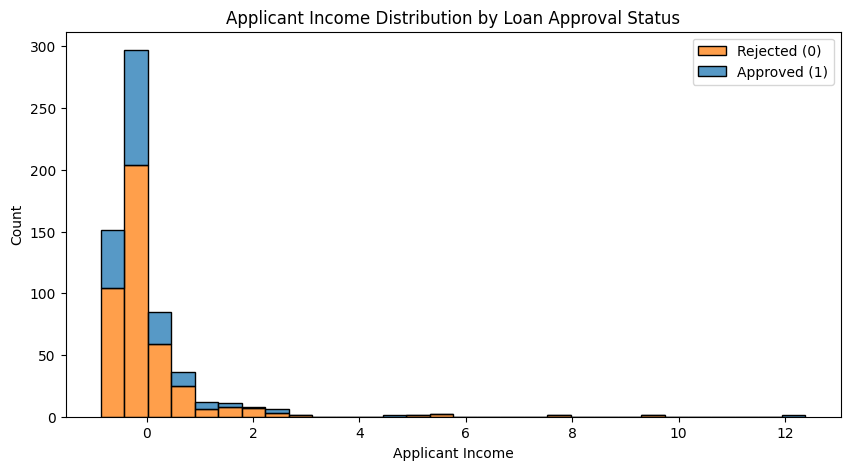

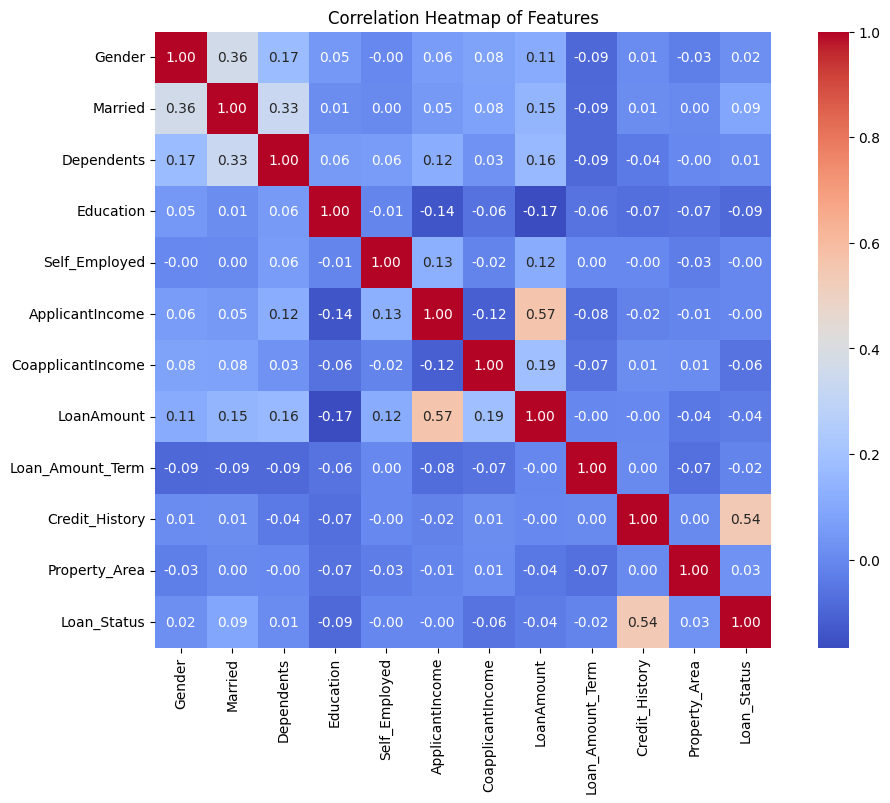

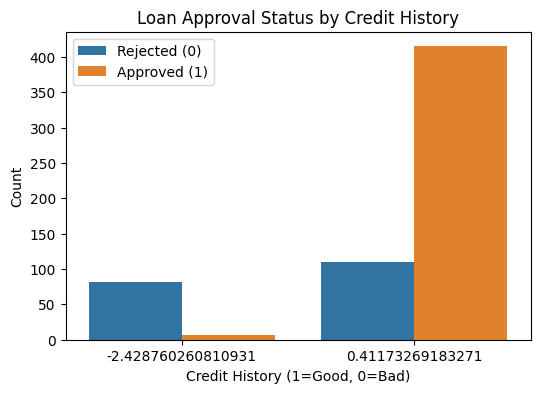

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Histogram: ApplicantIncome 분포를 Loan_Status_Y별로 시각화
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='ApplicantIncome', hue='Loan_Status', multiple='stack', bins=30)
plt.title('Applicant Income Distribution by Loan Approval Status')
plt.xlabel('Applicant Income')
plt.ylabel('Count')
plt.legend(['Rejected (0)', 'Approved (1)'])
plt.show()

# 2) Heatmap: 수치형 변수 간 상관관계 및 Loan_Status_Y와의 관계
plt.figure(figsize=(12,8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Features')
plt.show()

# 3) Barplot: Credit_History에 따른 대출 승인 비율
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Credit_History', hue='Loan_Status')
plt.title('Loan Approval Status by Credit History')
plt.xlabel('Credit History (1=Good, 0=Bad)')
plt.ylabel('Count')
plt.legend(['Rejected (0)', 'Approved (1)'])

plt.show()



### 5. 전처리된 데이터셋 제출

- 전처리된 데이터프레임을 csv로 변환하여 다운받아 과제란에 제출하세요.
- Data Transform된 feature들의 경우 원래 feature 이름과 동일해야합니다.
- 이름이 변경된 컬럼이 있다면 원래 이름으로 변경해주세요.

In [ ]:
# 예: 'Loan_Status_Y' → 'Loan_Status'로 컬럼명 복원
if 'Loan_Status_Y' in df.columns:
    df = df.rename(columns={'Loan_Status_Y': 'Loan_Status'})


# CSV 파일로 저장
df.to_csv('/content/drive/MyDrive/Colab Notebooks/250527EDA과제/preprocessed_loan_data3.csv', index=False)


## 2. Classification


### Main Goal : Model training & validation

### Sub Goals : Pre-processing한 데이터를 활용해 직접 학습 및 검증합니다.
1. Decision Tree, Random Forest, Support Vector Machine 중 가장 높은 성능의 Classifier 찾기
2. 5-fold cross validation을 활용하여 평가 및 **하이퍼파라미터 최소 2개 이상 튜닝**
3. validation에서 선택된 Best 모델로 test set에 대해서 성능 평가

### Dataset Construction & Split

**주의 : 데이터셋은 1에서 진행한 전처리된 데이터를 사용해야합니다!!**

해당 데이터셋의 label은 Loan_Status 즉 범주형입니다. 입니다.
HW1에서 학습할 모델은 'Pass_Fail'에 대한 분류 모델입니다.<br>

* 필요에 따라 X에 대해서 당연히 **feature selection**을 진행해도 됩니다. 심지어 feature extraction을 시도해 봐도 됩니다.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

path = "/content/drive/MyDrive/Colab Notebooks/250527EDA과제/preprocessed_loan_data3.csv" # 전처리 데이터 path 설정 필요


#==================아래 변경 금지===================#
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/250527EDA과제/preprocessed_loan_data3.csv")
X =  df.drop(columns=[ "Loan_Status" ]) # target 제거
y = df["Loan_Status"] # target

# feature selection이 필요하면 진행 가능
# X = X[['Selected feature 1', 'Selected feature 2', ... ]]

X_train, X_test, y_train, y_test = train_test_split(x,y,random_state = 4, test_size = 0.25, stratify = y)

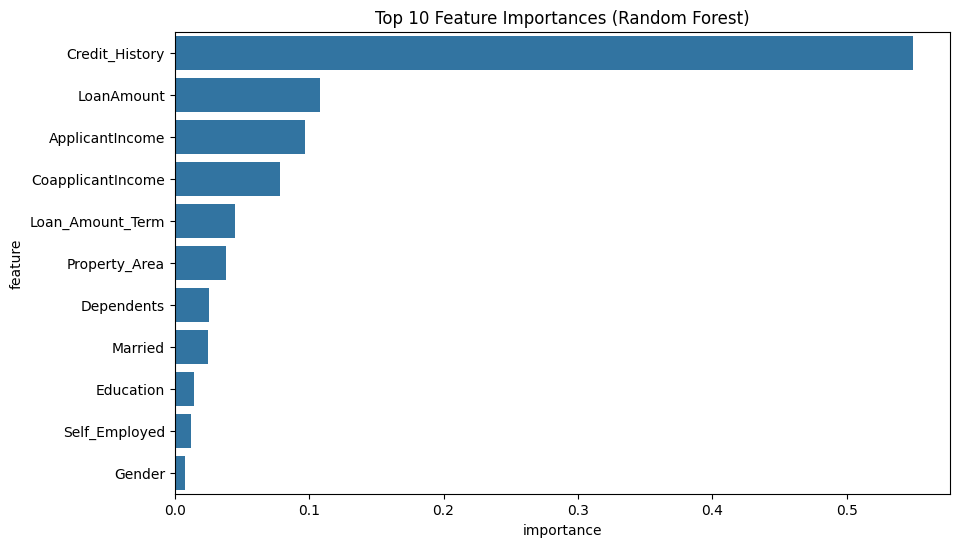

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 피처 중요도 시각화
importances = rf_best.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'feature': features, 'importance': importances})
importance_df = importance_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='importance', y='feature', data=importance_df.head(20))
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()


### Train & Validation

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [ ]:
# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_test)

# Calculate prediction accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Validation Accuracy:', accuracy)


Validation Accuracy: 0.8376623376623377


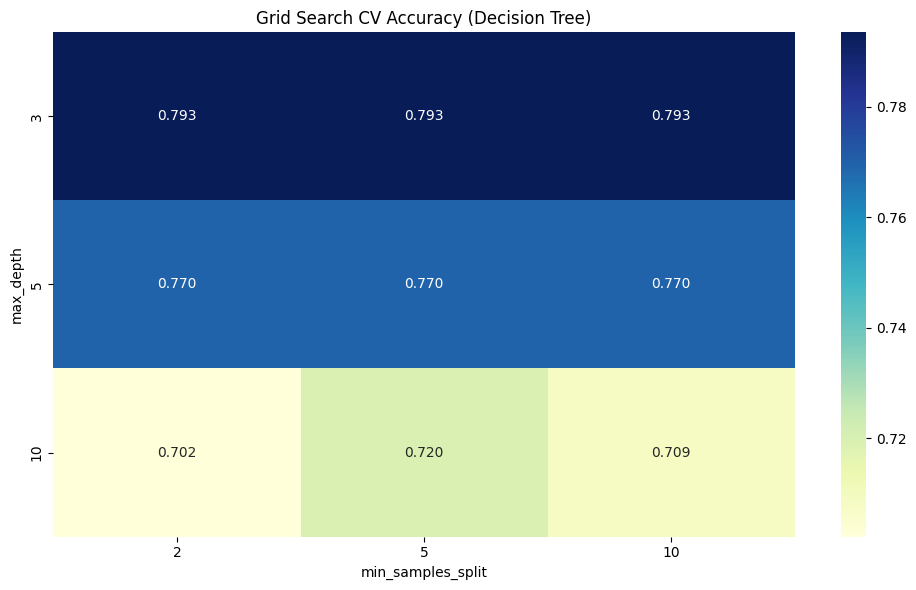

In [ ]:
# Decision Tree Classifier 정의, 학습
dt_params = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}
dt_clf = DecisionTreeClassifier(random_state=42)
dt_grid = GridSearchCV(dt_clf, dt_params, cv=5, scoring='accuracy')
# 5-fold cross validation을 활용하여 평가  + 하이퍼파라미터 최소 2개 이상 튜닝
dt_grid.fit(X_train, y_train)
dt_best = dt_grid.best_estimator_

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# GridSearch 결과를 DataFrame으로 변환
cv_results = pd.DataFrame(dt_grid.cv_results_)

# max_depth와 min_samples_split에 따른 평균 정확도 시각화
pivot_table = cv_results.pivot_table(
    index='param_max_depth',
    columns='param_min_samples_split',
    values='mean_test_score'
)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap='YlGnBu')
plt.title("Grid Search CV Accuracy (Decision Tree)")
plt.xlabel("min_samples_split")
plt.ylabel("max_depth")
plt.tight_layout()
plt.show()


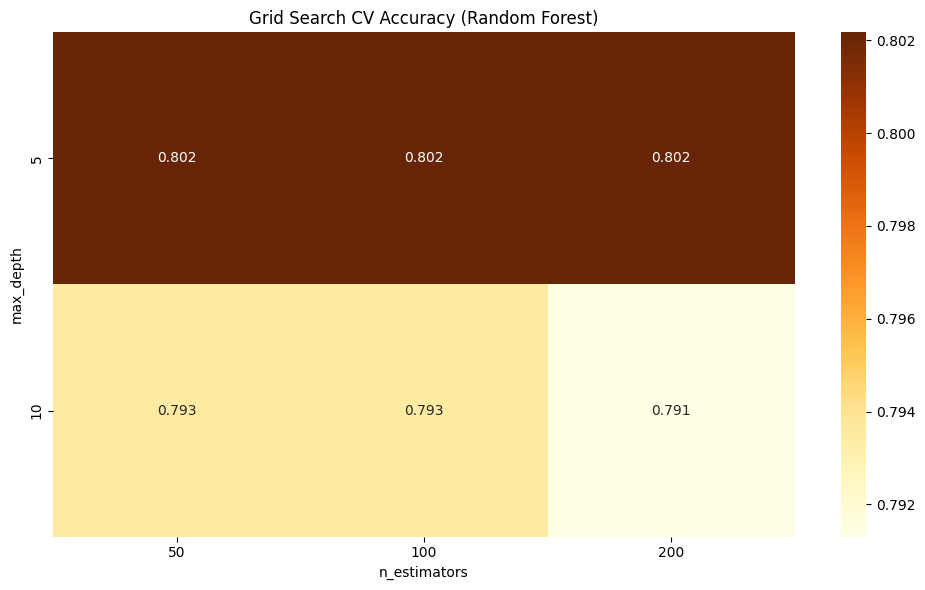

In [ ]:
# Random Forest Classifier 정의, 학습
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None]
}
rf_clf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf_clf, rf_params, cv=5, scoring='accuracy')
# 5-fold cross validation을 활용하여 평가  + 하이퍼파라미터 최소 2개 이상 튜닝
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# GridSearchCV 결과 → DataFrame
rf_results = pd.DataFrame(rf_grid.cv_results_)

# Heatmap 생성 (n_estimators vs max_depth)
rf_pivot = rf_results.pivot_table(
    index='param_max_depth',
    columns='param_n_estimators',
    values='mean_test_score'
)

plt.figure(figsize=(10, 6))
sns.heatmap(rf_pivot, annot=True, fmt=".3f", cmap="YlOrBr")
plt.title("Grid Search CV Accuracy (Random Forest)")
plt.xlabel("n_estimators")
plt.ylabel("max_depth")
plt.tight_layout()
plt.show()


SVC Accuracy
Accuracy:  0.8246753246753247 
Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      0.44      0.61        48
         1.0       0.80      1.00      0.89       106

    accuracy                           0.82       154
   macro avg       0.90      0.72      0.75       154
weighted avg       0.86      0.82      0.80       154



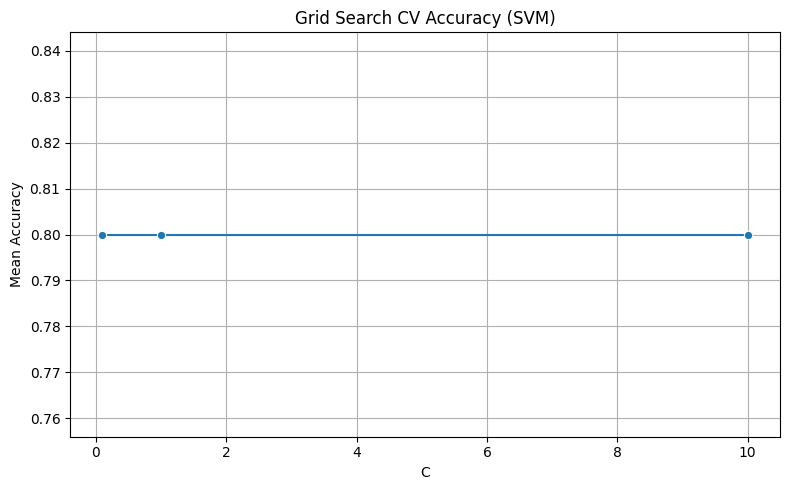

In [ ]:
# SVM Classifier 정의, 학습

svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear']
}
svm_clf = mymodel(SVC())
svm_grid = GridSearchCV(svm_clf, svm_params, cv=5, scoring='accuracy')
# 5-fold cross validation을 활용하여 평가  + 하이퍼파라미터 최소 2개 이상 튜닝
svm_grid.fit(X_train, y_train)
svm_best = svm_grid.best_estimator_

# GridSearchCV 결과 → DataFrame
svm_results = pd.DataFrame(svm_grid.cv_results_)

# 시각화: C에 따른 정확도
plt.figure(figsize=(8, 5))
sns.lineplot(x=svm_results['param_C'].astype(float), y=svm_results['mean_test_score'], marker='o')
plt.title("Grid Search CV Accuracy (SVM)")
plt.xlabel("C")
plt.ylabel("Mean Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()


### Final Test score (accuracy)

- accuracy 75% 이상의 모델을 제시하시오.

In [ ]:
# Validation에서 가장 높은 성능을 보인 Model의 testset에 대한 accuracy 도출

models = {
    "Decision Tree": dt_grid,
    "Random Forest": rf_grid,
    "SVM": svm_grid
}

print("\n=== Test Set Performance ===")
for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))


=== Test Set Performance ===
Decision Tree Accuracy: 0.8117
              precision    recall  f1-score   support

         0.0       0.85      0.48      0.61        48
         1.0       0.80      0.96      0.88       106

    accuracy                           0.81       154
   macro avg       0.83      0.72      0.74       154
weighted avg       0.82      0.81      0.79       154

Random Forest Accuracy: 0.8312
              precision    recall  f1-score   support

         0.0       1.00      0.46      0.63        48
         1.0       0.80      1.00      0.89       106

    accuracy                           0.83       154
   macro avg       0.90      0.73      0.76       154
weighted avg       0.86      0.83      0.81       154

SVM Accuracy: 0.8377
              precision    recall  f1-score   support

         0.0       1.00      0.48      0.65        48
         1.0       0.81      1.00      0.89       106

    accuracy                           0.84       154
   macro avg   

## 3. extra credit

- 추가 점수를 위해 도전해 보세요.
- 2에서 진행한 것과와 동일하게, 5-fold CV로 평가 및 하이퍼파라미터를 튜닝하고 Test set에서 최종 성능을 평가합니다.
- Test Accucracy 80% 이상 시 점수 부여
- DT, RF, SVM 이외의 분류기를 사용하시오. (단일 KNN 제외)
- ex) boosting, bagging 등

In [ ]:
# 새로운 분류기 모델 정의 및 학습
def mymodel(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    print(str(model)[:-2], 'Accuracy')
    print('Accuracy: ', accuracy_score(y_test,y_pred), "\nClassification Report: \n", classification_report(y_test, y_pred) )


    return model


In [ ]:
# accuracy

from xgboost import XGBClassifier

# XGBoost 모델 생성 및 평가
xgb = mymodel(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, .. Accuracy
Accuracy:  0.7987012987012987 
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.71      0.60      0.65        48
         1.0       0.83      0.89      0.86       106

    accuracy

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier  # 예시용 기본 모델

# 배깅 모델 정의 및 학습
bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)

bagging = mymodel(bagging_model)


BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50,
                  random_state=4 Accuracy
Accuracy:  0.8051948051948052 
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.82      0.48      0.61        48
         1.0       0.80      0.95      0.87       106

    accuracy                           0.81       154
   macro avg       0.81      0.72      0.74       154
weighted avg       0.81      0.81      0.79       154



수고하셨습니다! 과제란에 다음 파일을 제출해주세요.
- 학번.ipynb
- 전처리 완료된 student dataset 데이터프레임 (학번.csv)
- 과제 보고서 (학번.pdf)